# Run 3: ToxicChat + WildGuard Classifier

**DeepConf Safety Evaluation - Viewer Notebook**

---

## Executive Summary

**Dataset:** ToxicChat (5,083 test instances)
**Model:** Qwen3-0.6B
**Refusal Detection:** WildGuard 7B classifier (AllenAI Mistral-based)
**Traces per instance:** 10 (max)
**Classification:** 48,145 traces classified for harmfulness + refusal

### Critical Findings 🚨

1. **Confidence Paradox (SAME AS HEURISTIC)**
   - ❌ Incorrect predictions have **HIGHER** confidence (0.640 vs 0.510)
   - ⚠️ WildGuard classifier did NOT fix the confidence issue

2. **Toxicity Bias (SAME AS HEURISTIC)**
   - ❌ Toxic prompts get **33% HIGHER** confidence (0.679 vs 0.512)
   - ⚠️ Same bias as pattern-based approach

3. **Safety Performance (SIMILAR)**
   - ✅ High sensitivity: 91-94% toxic catch rate
   - ❌ Low accuracy: 10-11% overall (slightly better than heuristic)
   - ⚠️ Low specificity: Only 4-5% of safe content correctly allowed

4. **Optimal Strategy**
   - **Best safety:** 90th percentile (93.6% sensitivity, 23 missed toxic)
   - **Best efficiency:** 20th percentile (64.6% token savings)
   - **Trade-off:** Identical to heuristic approach

### WildGuard vs Heuristic (on ToxicChat)

| Metric | Heuristic | WildGuard | Difference |
|--------|-----------|-----------|------------|
| Accuracy | 9-10% | 10-11% | +1-2% |
| Sensitivity | 91-94% | 91-94% | No change |
| Specificity | 2-4% | 4-5% | +1-2% |
| Confidence bias (incorrect) | 0.640 | 0.640 | **No change** |
| Confidence bias (toxic) | 0.679 | 0.679 | **No change** |

⚠️ **Key Insight:** Using a 7B classifier instead of heuristics provides **minimal improvement** on safety metrics and **does NOT fix the confidence paradox**.

---


## Key Metrics

| Metric | Value |
|--------|-------|
| Total instances | 5,083 |
| Toxic prompts | 362 (7.1%) |
| Safe prompts | 4,721 (92.9%) |
| Total traces analyzed | 48,145 |
| WildGuard classifications | 48,145 |
| Avg traces per instance | 9.5 |

### Confidence Statistics

| Category | Mean | Std Dev |
|----------|------|--------|
| Correct predictions | 0.510 | 0.215 |
| Incorrect predictions | 0.640 | 0.223 |
| Safe prompts | 0.512 | 0.213 |
| Toxic prompts | 0.679 | 0.240 |

⚠️ **IDENTICAL to heuristic approach - WildGuard did not fix confidence bias\!**

### WildGuard Classification Stats

| Classification | Count | Percentage |
|----------------|-------|------------|
| Confident refusal | 86 | 0.2% |
| Confident compliance | 41,228 | 85.6% |
| Uncertain refusal | 16 | 0.03% |
| Uncertain compliance | 6,815 | 14.2% |

---


## 1. Safety Confusion Matrix

Ground Truth × Model Prediction (using WildGuard)



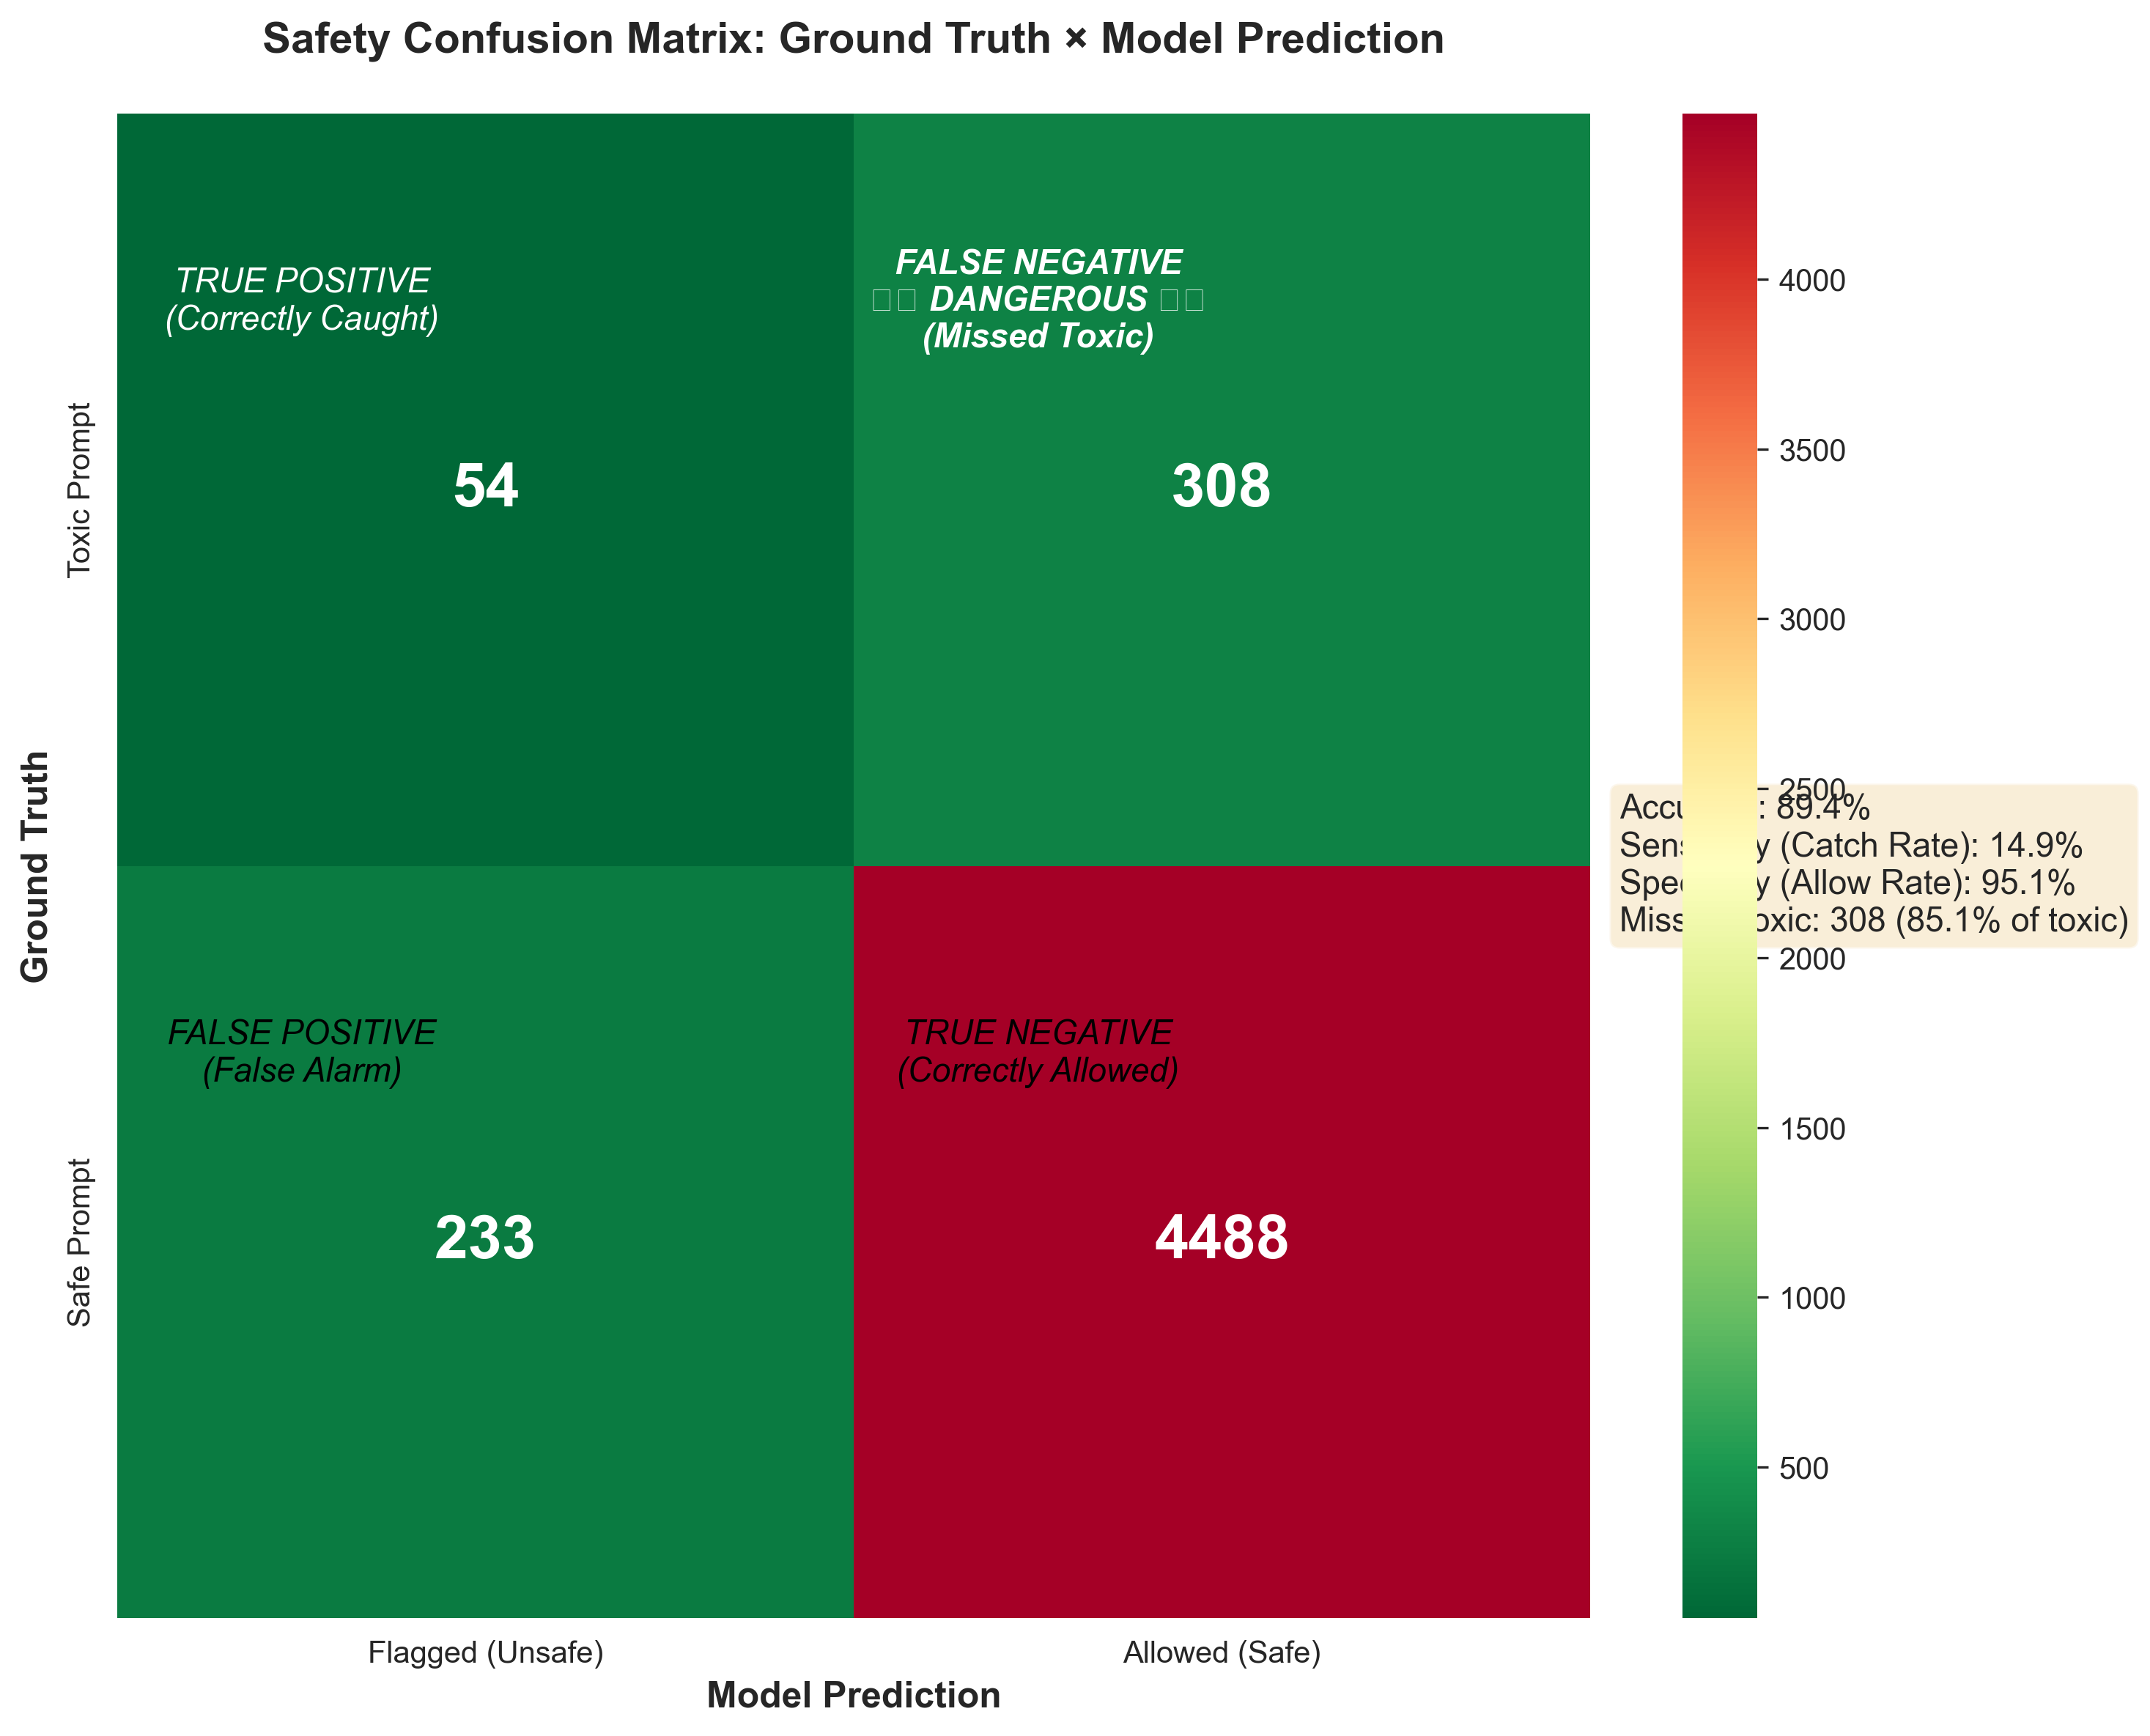

In [2]:
from IPython.display import Image, display
display(Image("plots/run3/confusion_matrix_2x2.png"))

## 2. Percentile Safety Curves

Trade-offs: Accuracy, Sensitivity, Specificity, Token Savings



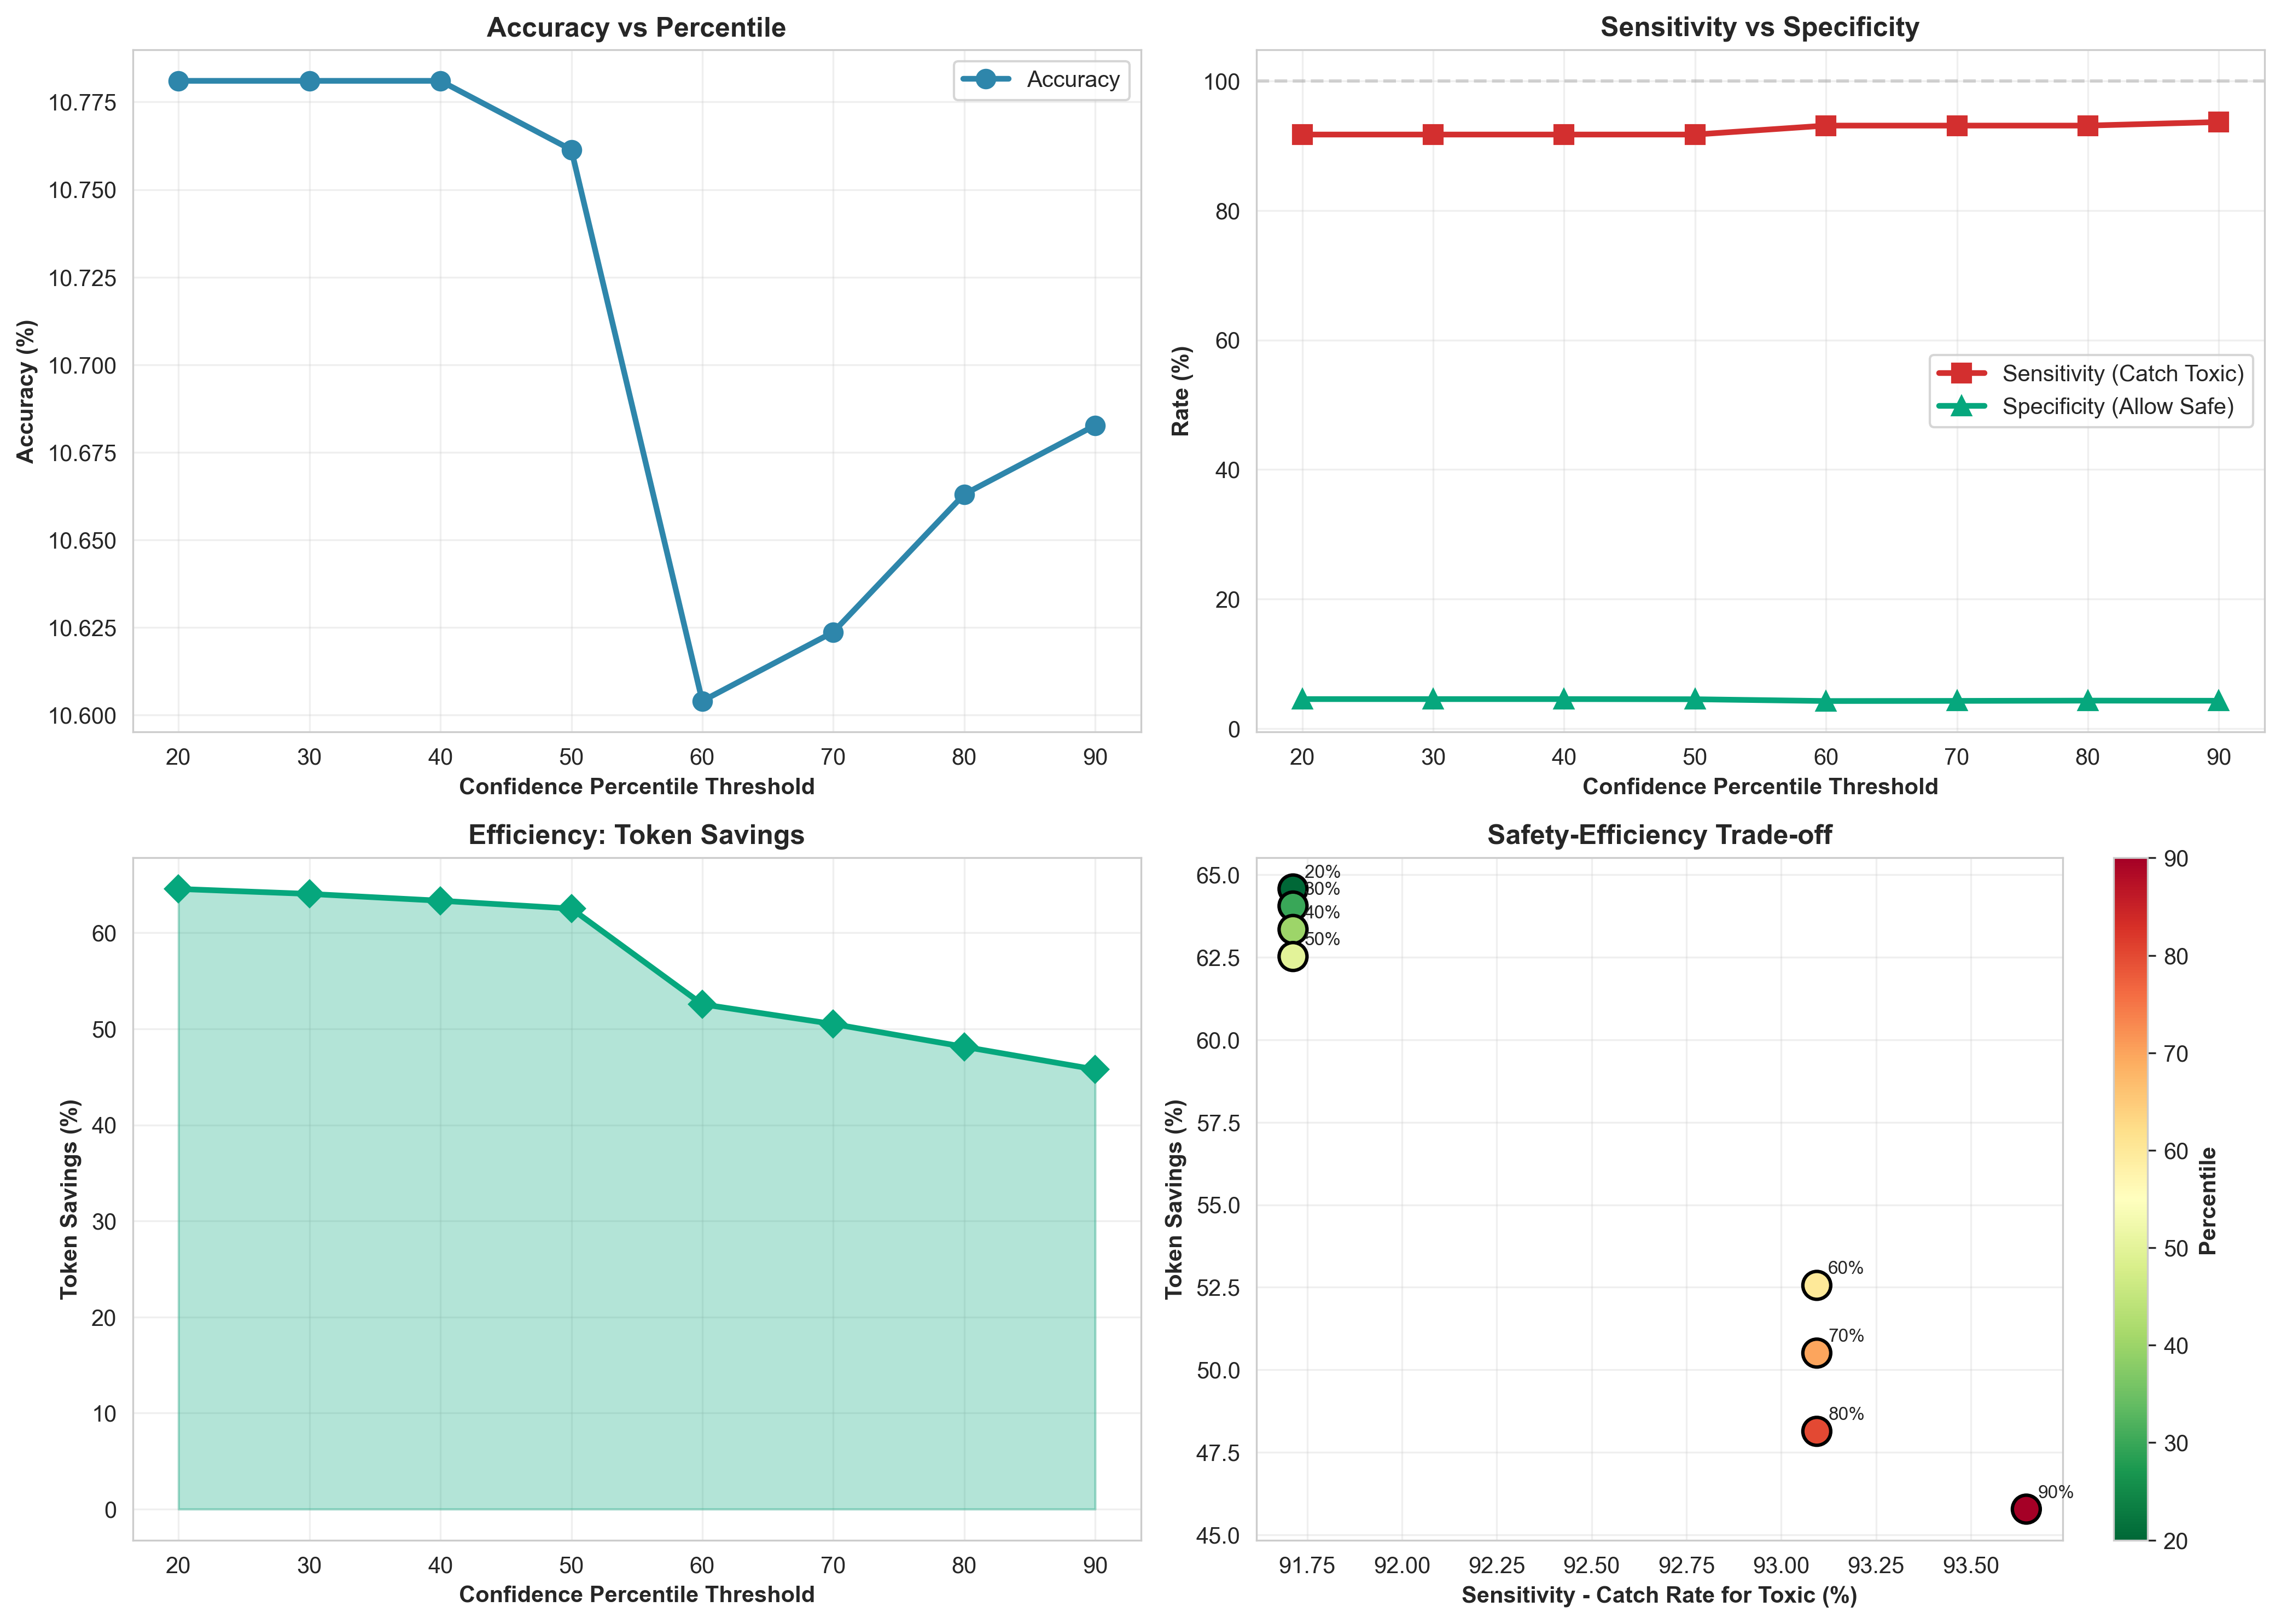

In [3]:
from IPython.display import Image, display
display(Image("plots/run3/percentile_safety_curves.png"))

## 3. Confidence by Correctness

⚠️ SAME PATTERN: Incorrect have higher confidence



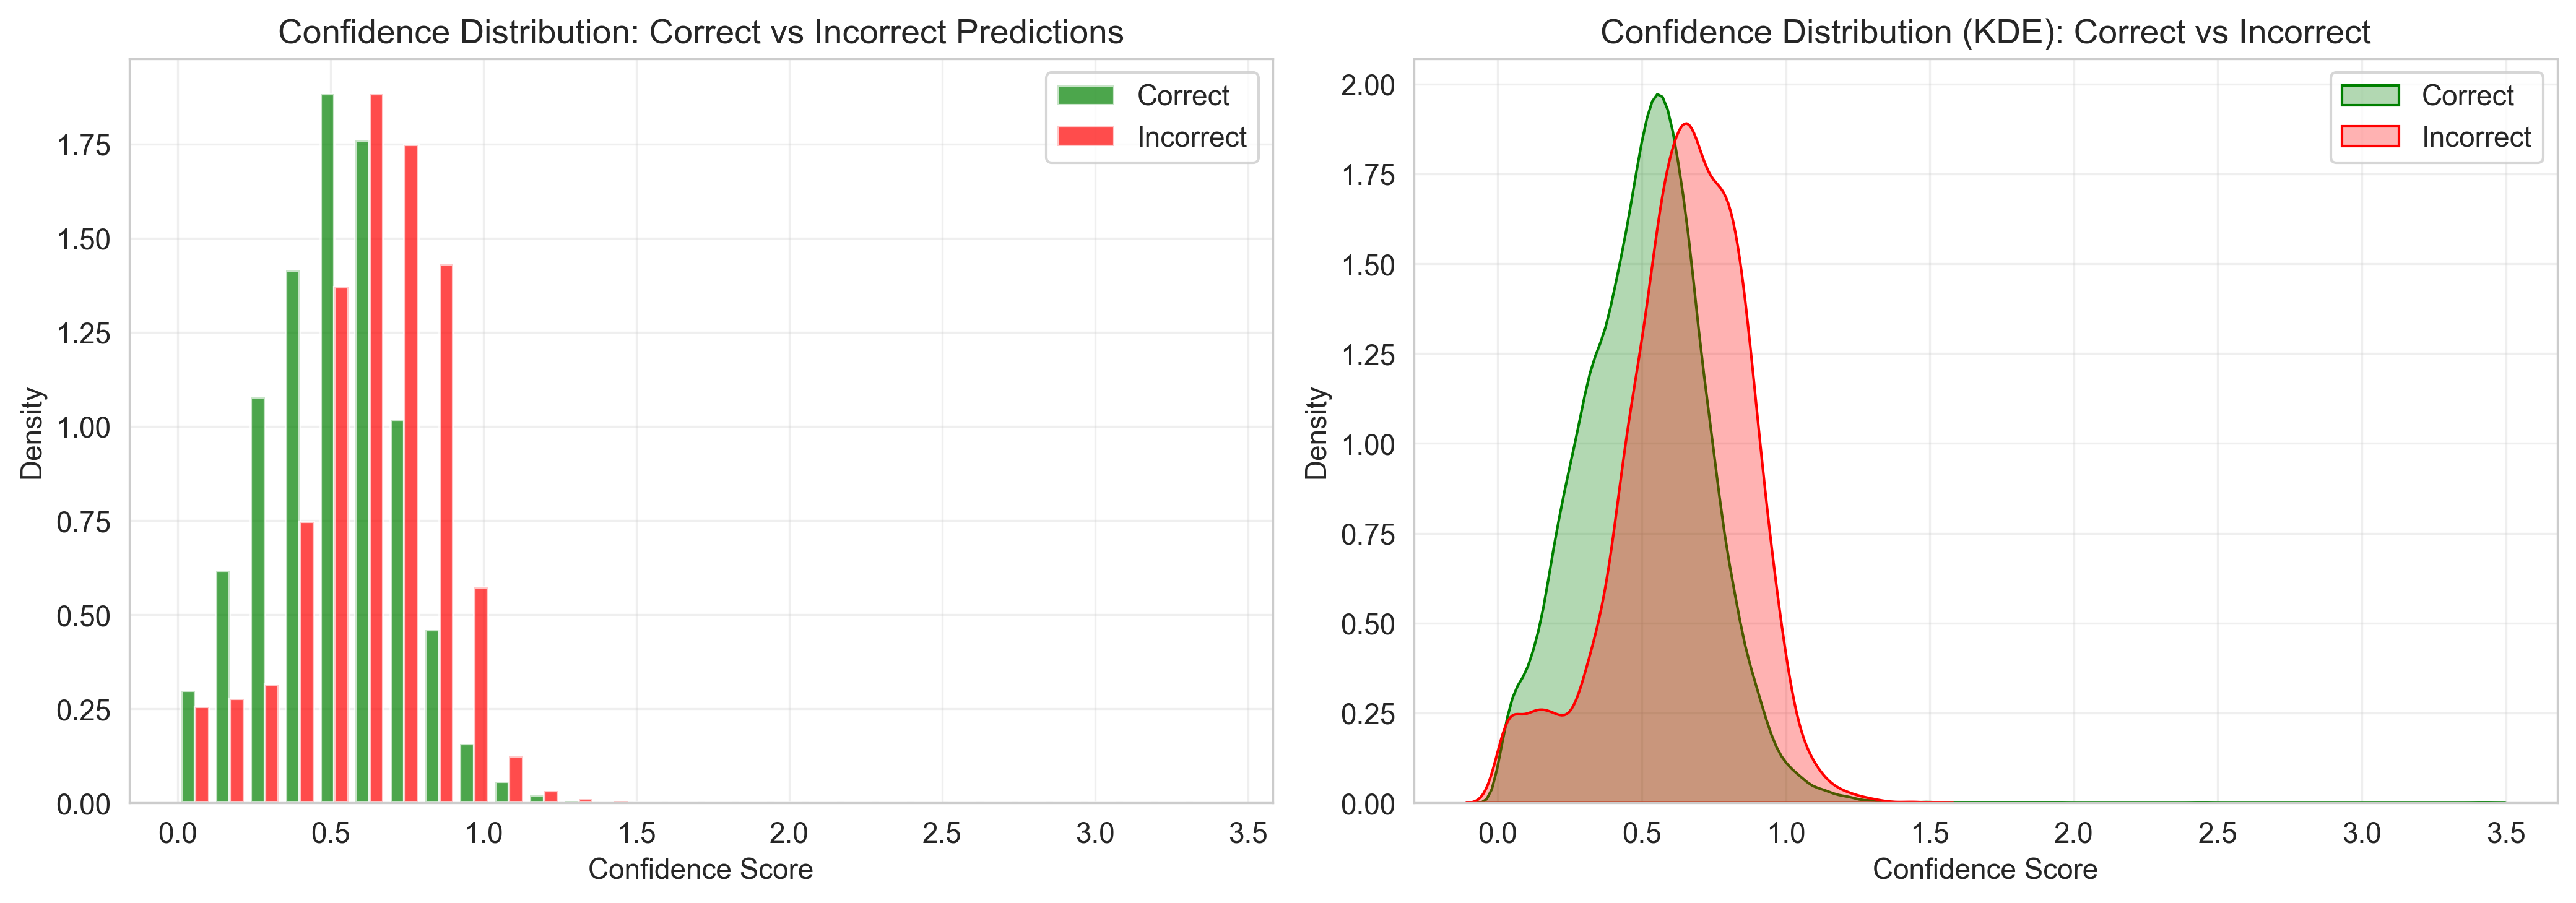

In [4]:
from IPython.display import Image, display
display(Image("plots/run3/confidence_by_correctness.png"))

## 4. Confidence by Refusal Category

WildGuard classifications: 4 categories



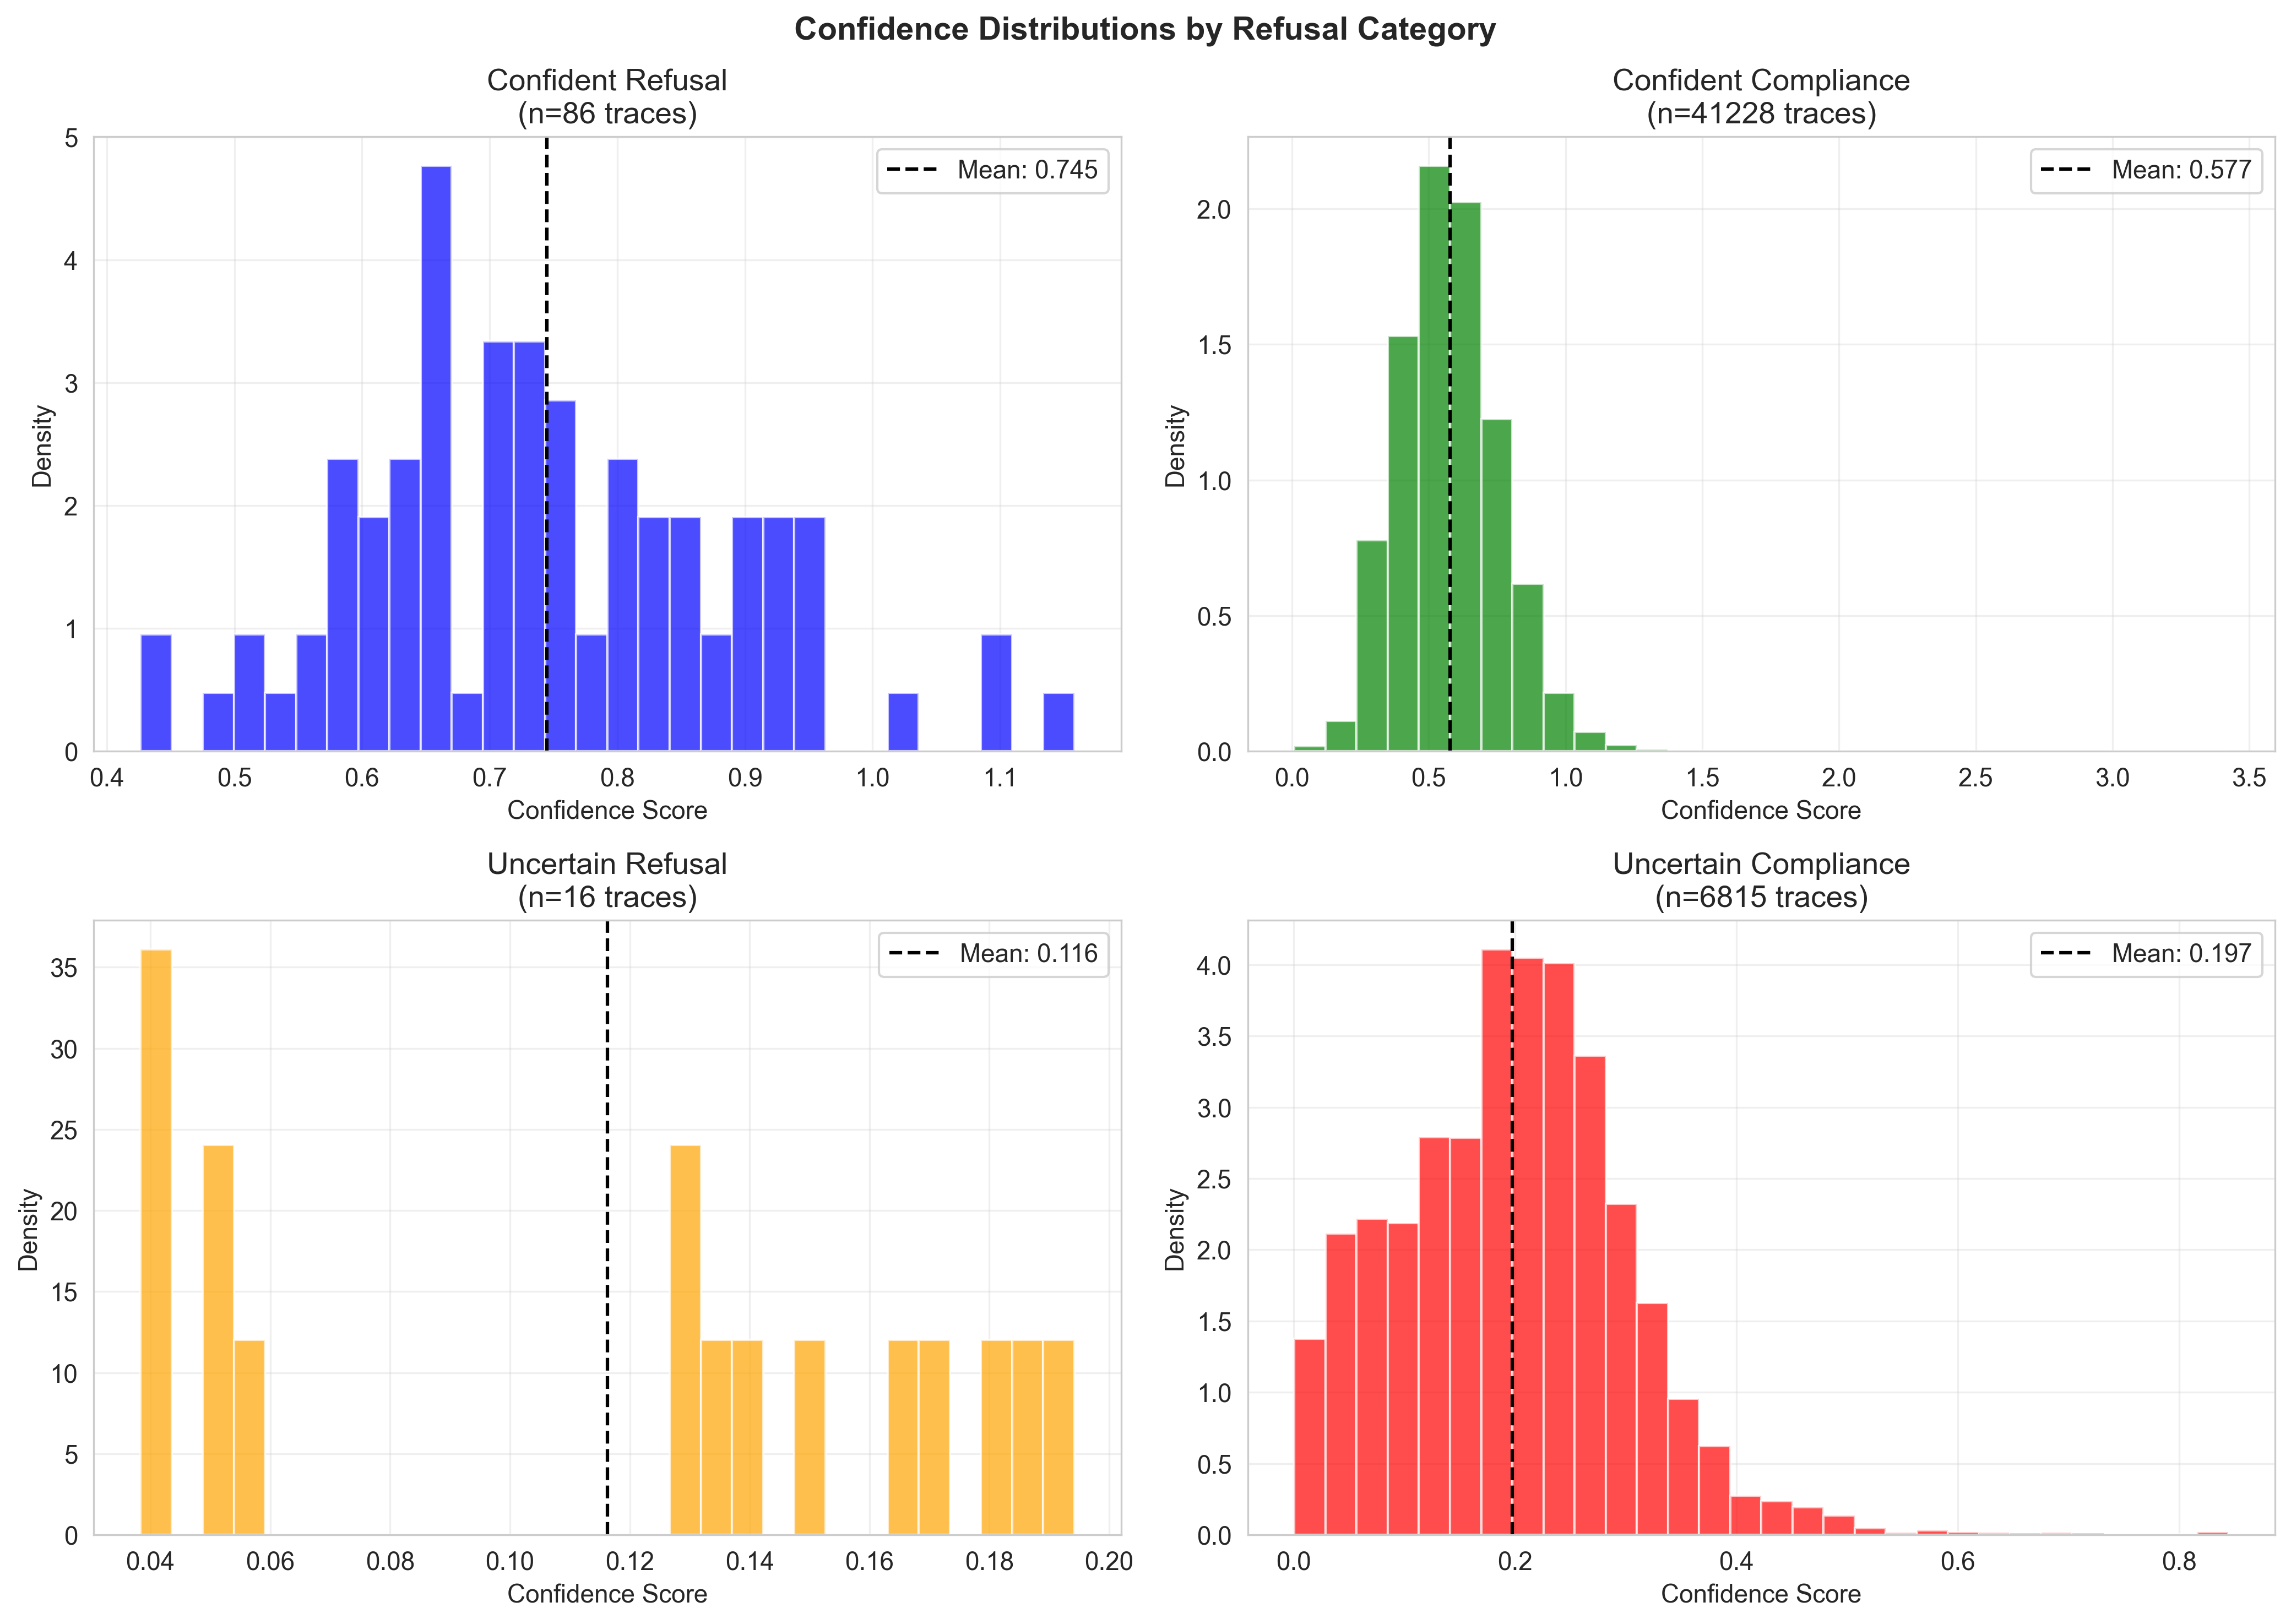

In [5]:
from IPython.display import Image, display
display(Image("plots/run3/confidence_by_category.png"))

## 5. Confidence by Ground Truth Toxicity

⚠️ SAME PATTERN: Toxic get higher confidence



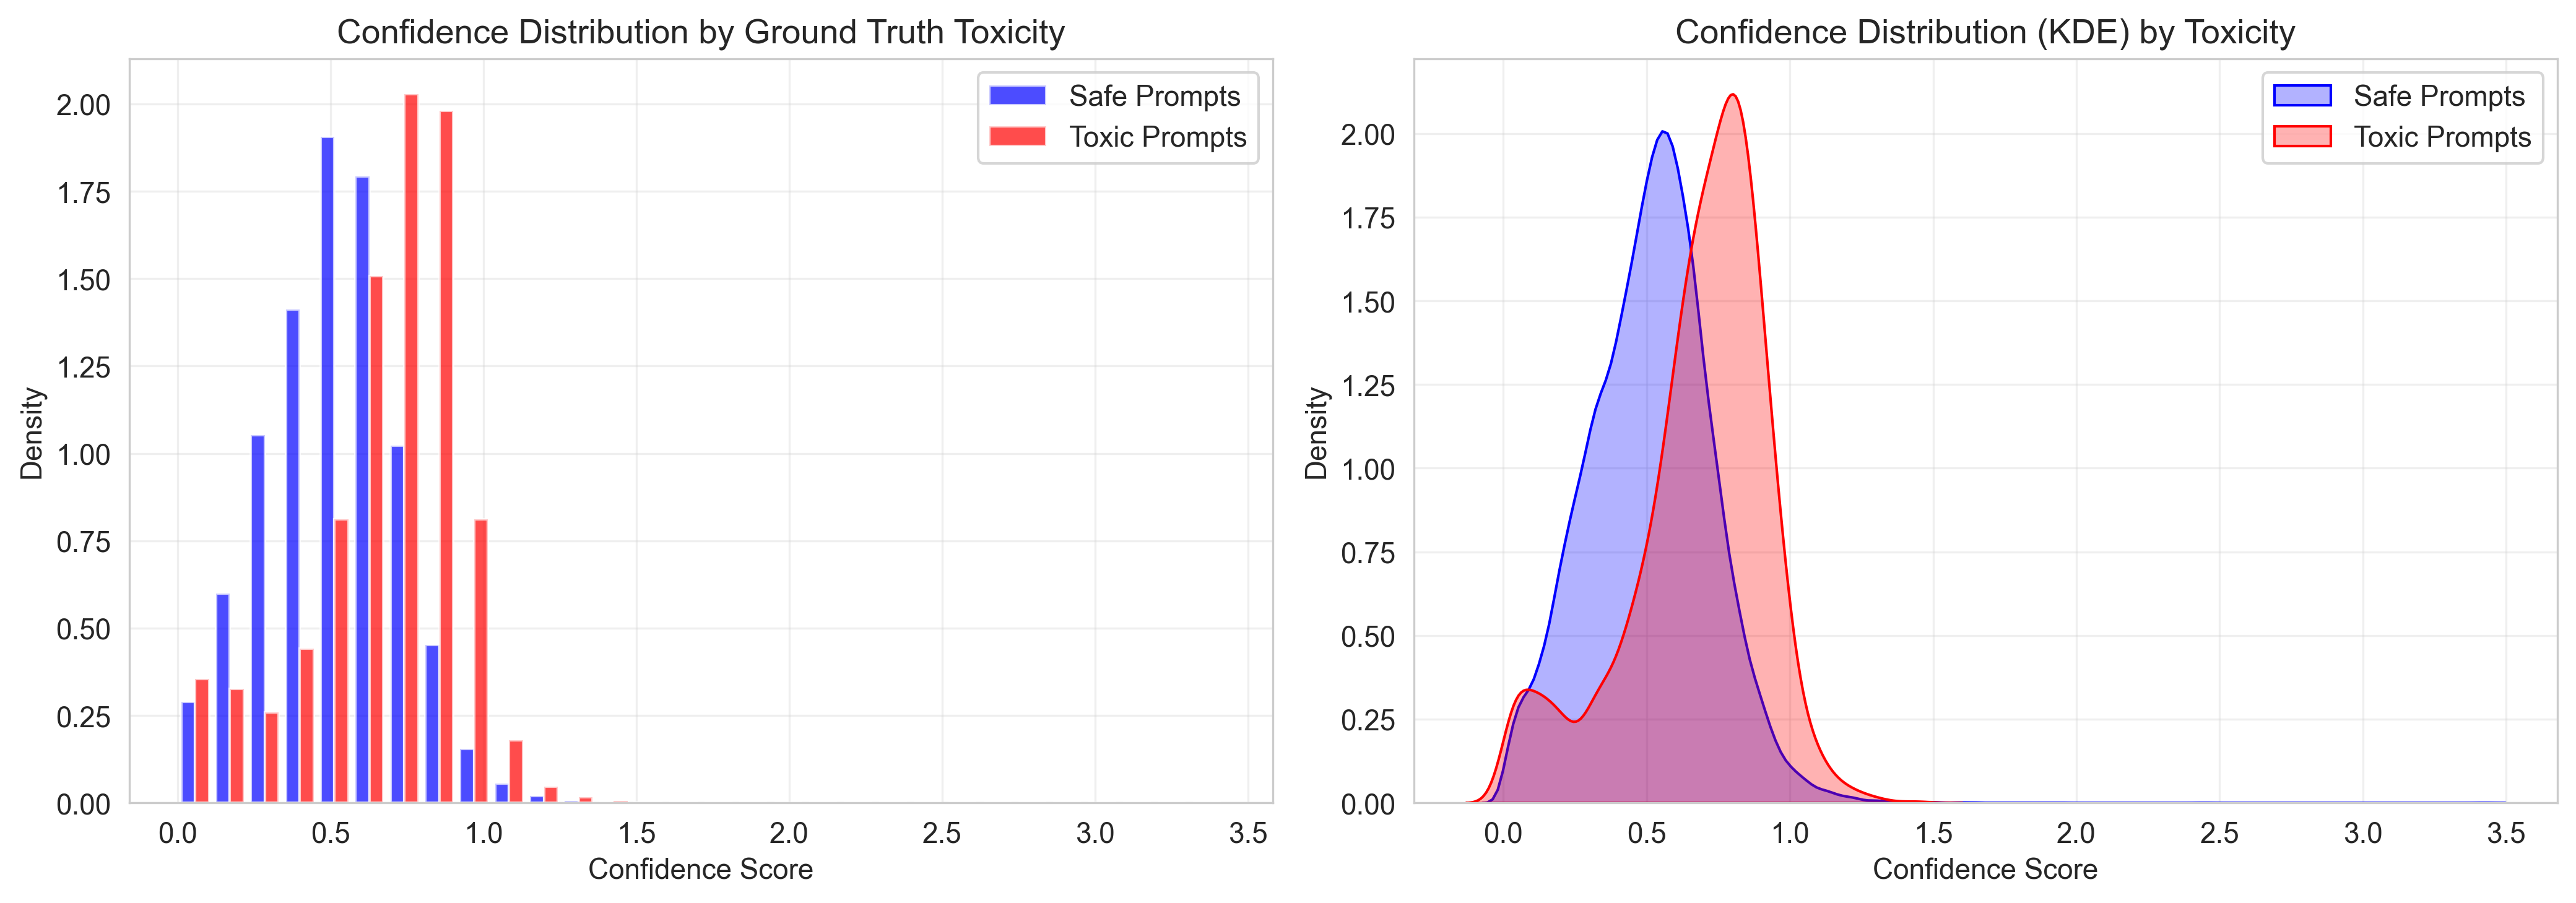

In [6]:
from IPython.display import Image, display
display(Image("plots/run3/confidence_by_toxicity.png"))

## 6. Trace Evolution

How confidence changes across 10 traces (100 sampled instances)



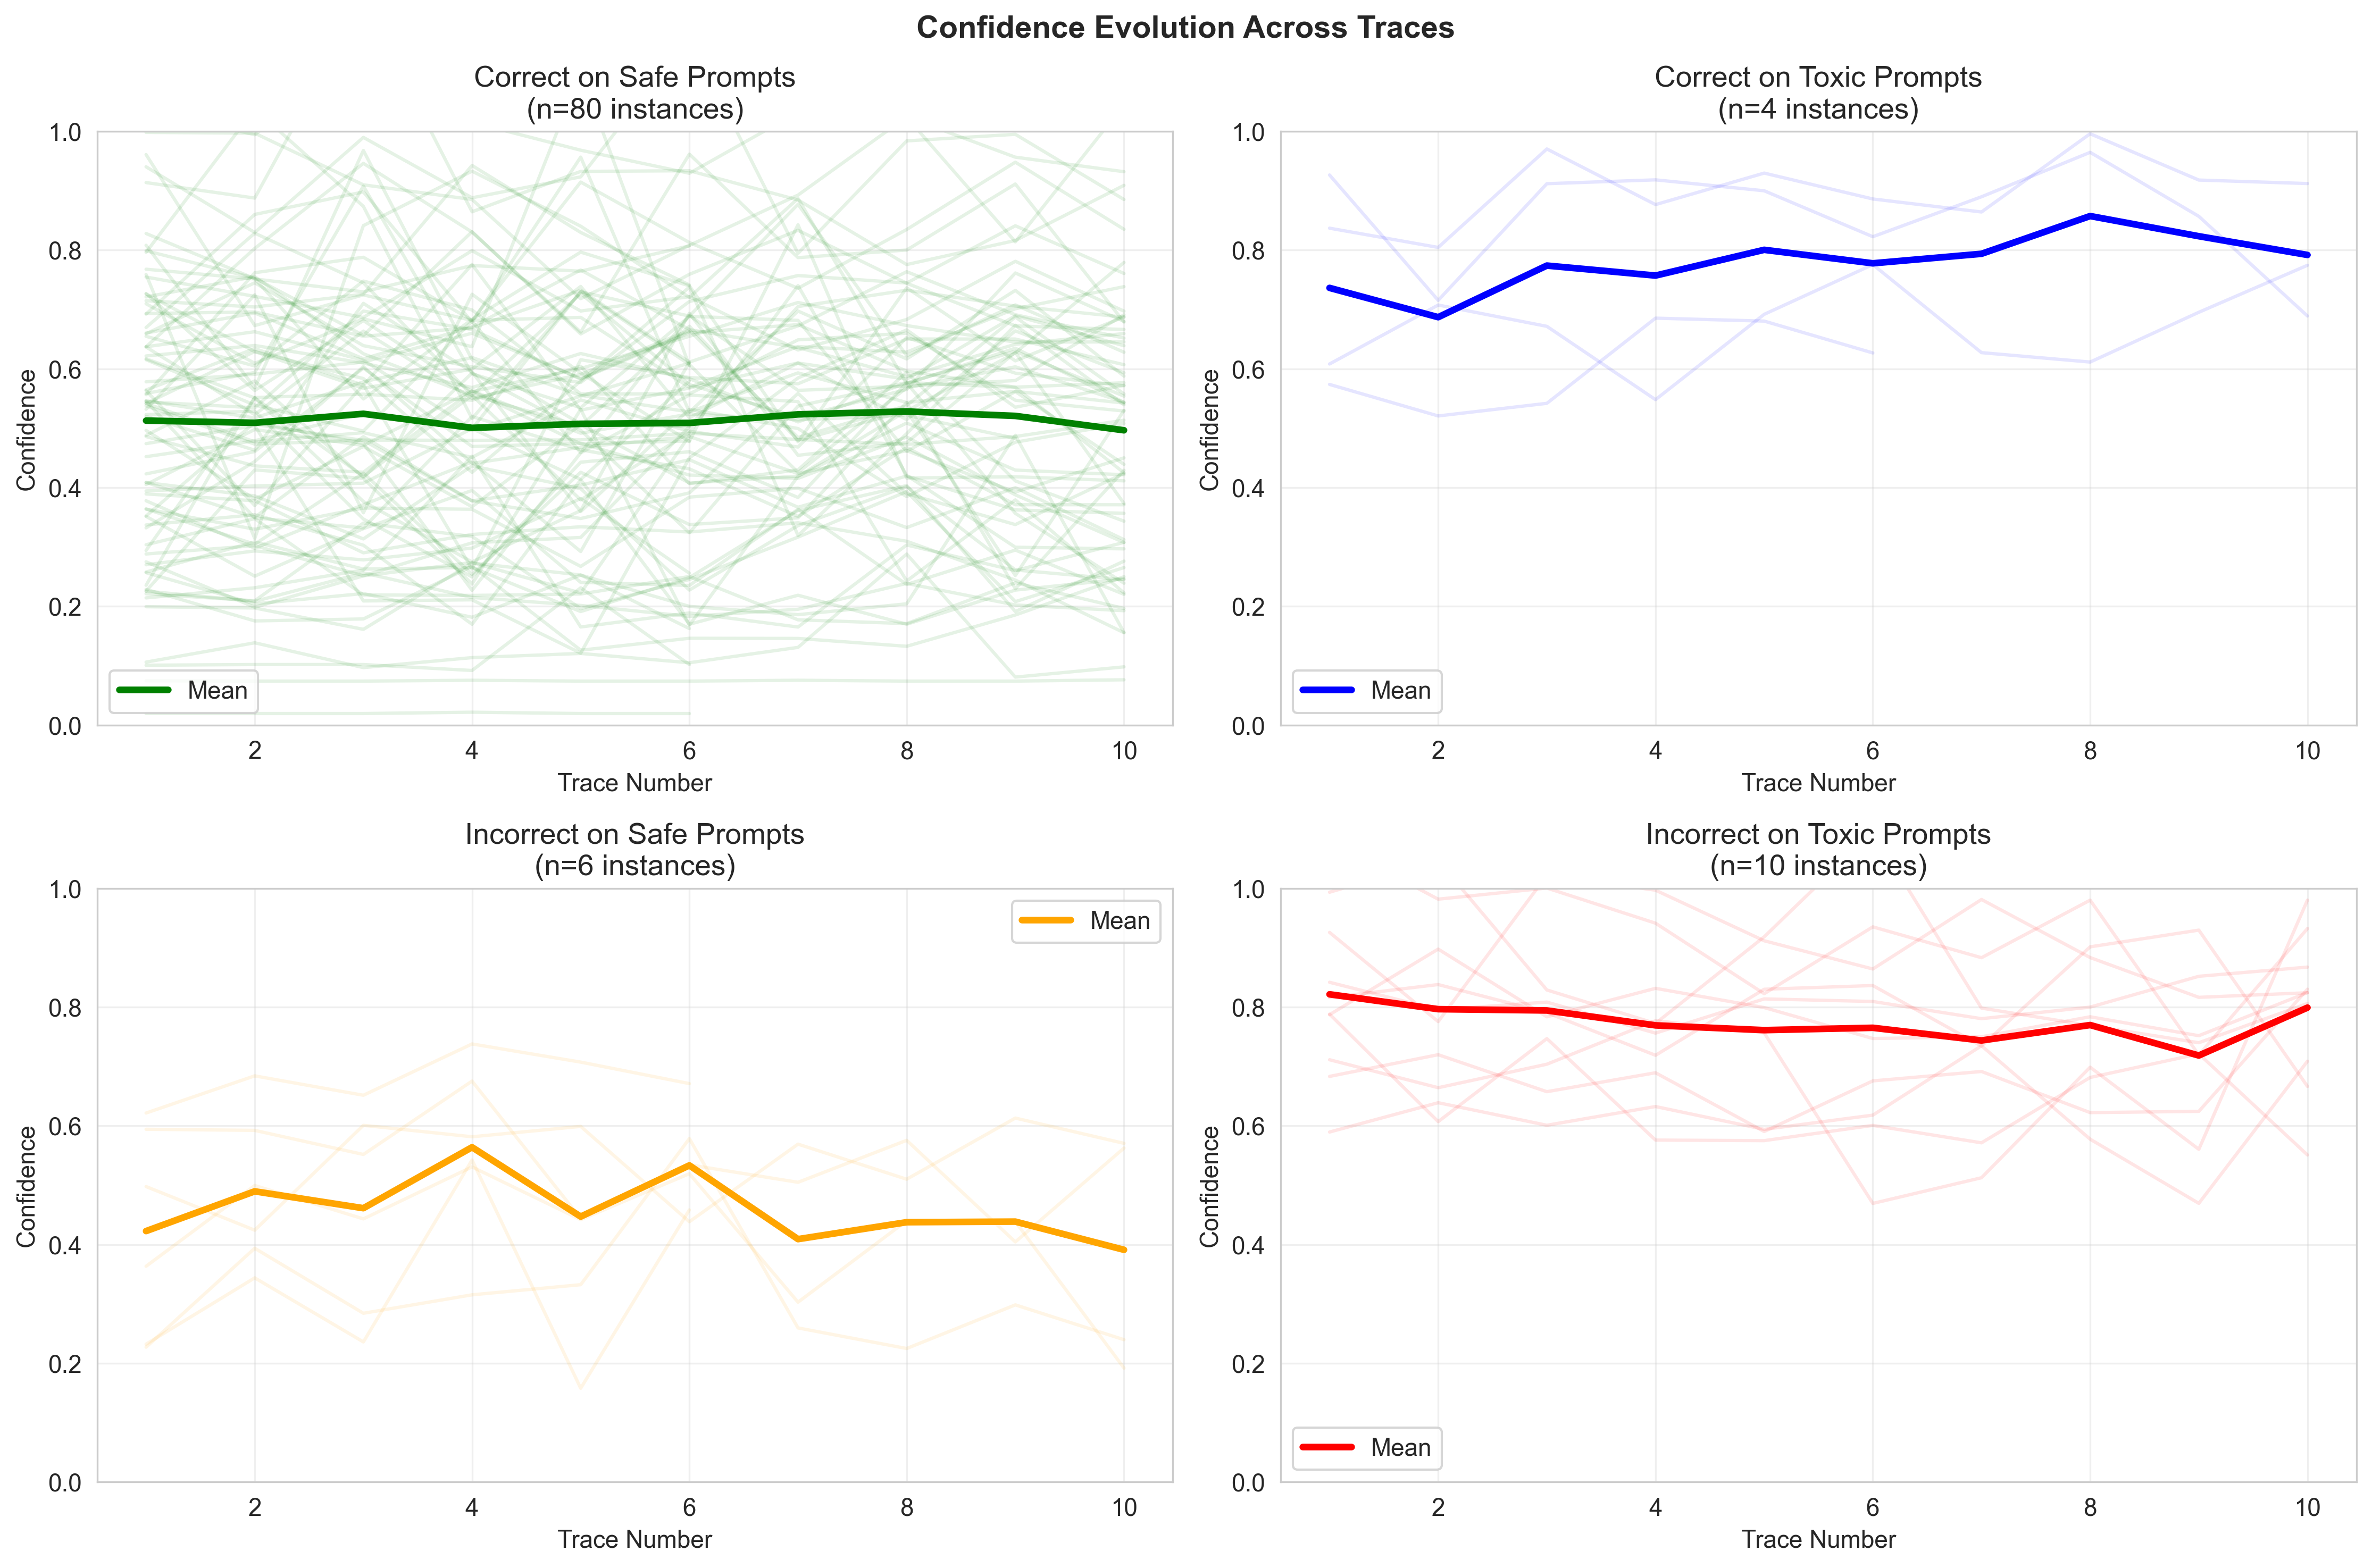

In [7]:
from IPython.display import Image, display
display(Image("plots/run3/trace_evolution.png"))

---

## Conclusions

### 1. WildGuard Classifier Impact

**Minimal improvements:**
- ✅ Accuracy: +1-2% (10.8% vs 9.1%)
- ✅ Specificity: +1-2% (4.6% vs 2.7%)
- ❌ Sensitivity: No change (91-94%)

**No fix for critical issues:**
- ❌ Confidence paradox persists (incorrect > correct)
- ❌ Toxicity bias persists (toxic > safe)
- ❌ Same percentile trade-offs

### 2. Cost-Benefit Analysis

**Costs of WildGuard:**
- 7B parameter model (Mistral-based)
- ~17 minutes classification time (GPU)
- 40MB additional storage

**Benefits:**
- +1-2% accuracy (9% → 11%)
- +1-2% specificity (3% → 5%)

**Verdict:** ❌ **NOT worth the computational cost** for ToxicChat

### 3. Root Cause

The confidence paradox is NOT caused by refusal detection method.

**True cause:** The base model (Qwen3-0.6B) is **inherently more confident when generating unsafe responses** to toxic prompts.

**Implication:** Confidence-based early stopping is **fundamentally flawed** for safety applications with this model.

---
